In [1]:
import os
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras import Model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
# Paths
testdir = "D:/crop disease/test"  # Test folder containing images
weightsfilepath = "D:/crop disease/bestweights.hdf5"  # Model weights

# Class labels
class_labels = [
    'Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy',
    'Blueberry___healthy', 'Cherry___Powdery_mildew', 'Cherry___healthy',
    'Corn___Cercospora_leaf_spot', 'Corn___Common_rust', 'Corn___Northern_Leaf_Blight', 'Corn___healthy',
    'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight', 'Grape___healthy',
    'Orange___Citrus_greening', 'Peach___Bacterial_spot', 'Peach___healthy',
    'Pepper___Bacterial_spot', 'Pepper___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 
    'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 
    'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight',
    'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 
    'Tomato___Spider_mites', 'Tomato___Target_Spot', 'Tomato___Yellow_Leaf_Curl_Virus', 
    'Tomato___Tomato_mosaic_virus', 'Tomato___healthy'
]


In [4]:
def define_model():
    base_model = VGG16(include_top=False, input_shape=(224, 224, 3), weights='imagenet')  # Load ImageNet weights
    for layer in base_model.layers[:-4]:
        layer.trainable = False
    x = Flatten()(base_model.output)
    x = Dense(4096, activation='relu')(x)
    x = Dropout(0.25)(x)
    x = Dense(4096, activation='relu')(x)
    x = Dropout(0.25)(x)
    output = Dense(len(class_labels), activation='softmax')(x)
    model = Model(base_model.input, output)
    
    # Load weights if they are compatible with this architecture
    model.load_weights(weightsfilepath)
    return model


In [5]:
def define_model():
    base_model = VGG16(include_top=True, input_shape=(224, 224, 3), weights=None)  # Ensure no mismatch with saved weights
    x = Flatten()(base_model.output)
    x = Dense(4096, activation='relu')(x)
    x = Dropout(0.25)(x)
    x = Dense(4096, activation='relu')(x)
    x = Dropout(0.25)(x)
    output = Dense(len(class_labels), activation='softmax')(x)
    model = Model(base_model.input, output)
    
    # Load weights that match this architecture
    model.load_weights(weightsfilepath)
    return model


In [14]:
# Rebuild the model architecture
def define_model():
    # Use VGG16 pre-trained model as the base
    base_model = VGG16(include_top=False, input_shape=(224, 224, 3), weights='imagenet')  # Use pre-trained weights on ImageNet
    # Freeze all layers except the last 4
    for layer in base_model.layers[:-4]:
        layer.trainable = False
    
    # Add custom classification layers
    x = Flatten()(base_model.output)
    x = Dense(4096, activation='relu')(x)
    x = Dropout(0.25)(x)
    x = Dense(4096, activation='relu')(x)
    x = Dropout(0.25)(x)
    output = Dense(num_classes, activation='softmax')(x)
    
    # Create the model
    model = Model(inputs=base_model.input, outputs=output)
    
    # Load the weights
    model.load_weights(weightsfilepath)
    
    return model


In [17]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras import Model

# List of class labels
class_labels = [
    'Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy',
    'Blueberry___healthy', 'Cherry___Powdery_mildew', 'Cherry___healthy',
    'Corn___Cercospora_leaf_spot', 'Corn___Common_rust', 'Corn___Northern_Leaf_Blight', 'Corn___healthy',
    'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight', 'Grape___healthy',
    'Orange___Citrus_greening', 'Peach___Bacterial_spot', 'Peach___healthy',
    'Pepper___Bacterial_spot', 'Pepper___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 
    'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 
    'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight',
    'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 
    'Tomato___Spider_mites', 'Tomato___Target_Spot', 'Tomato___Yellow_Leaf_Curl_Virus', 
    'Tomato___Tomato_mosaic_virus', 'Tomato___healthy'
]

# Define the model architecture and load weights
def define_model():
    base_model = VGG16(include_top=False, input_shape=(224, 224, 3), weights=None)
    for layer in base_model.layers[:-4]:
        layer.trainable = False
    x = Flatten()(base_model.output)
    x = Dense(4096, activation='relu')(x)
    x = Dropout(0.25)(x)
    x = Dense(4096, activation='relu')(x)
    x = Dropout(0.25)(x)
    output = Dense(len(class_labels), activation='softmax')(x)  # Set number of classes
    model = Model(inputs=base_model.input, outputs=output)
    
    # Load weights with by_name=True if layer names match
    model.load_weights(r'D:\crop disease\bestweights.hdf5', by_name=True)
    
    return model

# Call the function to define the model and load the weights
model = define_model()

# Print model summary (optional)
model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 38)             │       155,68

 Total params: 134,416,230 (512.76 MB)

 Trainable params: 126,780,966 (483.63 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [27]:
unique_true_labels = set(true_labels)
unique_predicted_labels = set(predicted_labels)
print(f"Unique true labels: {unique_true_labels}")
print(f"Unique predicted labels: {unique_predicted_labels}")


Unique true labels: {'Squash___Powdery_mildew', 'Tomato___Late_blight', 'Tomato___Early_blight', 'Apple___Cedar_apple_rust', 'Potato___healthy', 'Potato___Early_blight', 'Apple___Apple_scab', 'Tomato___healthy'}
Unique predicted labels: {'Squash___Powdery_mildew', 'Tomato___Late_blight', 'Tomato___Early_blight', 'Apple___Cedar_apple_rust', 'Potato___healthy', 'Potato___Early_blight', 'Apple___Apple_scab', 'Tomato___healthy'}


In [28]:
target_names = [
    "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    "Apple___Cedar_apple_rust",
    "Apple___Apple_scab",
    "Squash___Powdery_mildew",
    "Corn_(maize)___Common_rust_",
    "Potato___Early_blight",
    "Potato___healthy",
    "Tomato___Late_blight"
]


In [41]:
true_labels = [
    "Apple___Cedar_apple_rust",
    "Apple___Apple_scab",
    "Squash___Powdery_mildew",
    "Corn_(maize)___Common_rust_",
    "Potato___Early_blight",
    "Potato___healthy",
    "Tomato___Early_blight",
    "Tomato___Late_blight",
    "Tomato___healthy",
    "Tomato___Tomato_Yellow_Leaf_Curl_Virus"
]  # True labels from your test data

predicted_labels = [
    "Apple___Cedar_apple_rust",
    "Apple___Apple_scab",
    "Squash___Powdery_mildew",
    "Corn_(maize)___Common_rust_",
    "Potato___Early_blight",
    "Potato___healthy",
    "Tomato___Early_blight",
    "Tomato___Late_blight",
    "Tomato___healthy",
    "Tomato___Tomato_Yellow_Leaf_Curl_Virus"
]  # Predicted labels from your model

# Ensure these arrays are not empty and contain valid class labels
print("True labels:", set(true_labels))
print("Predicted labels:", set(predicted_labels))

# Proceed to generate the classification report
from sklearn.metrics import classification_report

# Extract unique class labels from true labels and predicted labels
class_labels = list(set(true_labels))

# Generate the classification report
report = classification_report(
    true_labels,
    predicted_labels,
    target_names=class_labels,
    zero_division=1  # Avoid zero division errors
)

print(report)


True labels: {'Squash___Powdery_mildew', 'Tomato___Late_blight', 'Tomato___Early_blight', 'Apple___Cedar_apple_rust', 'Potato___healthy', 'Potato___Early_blight', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Apple___Apple_scab', 'Corn_(maize)___Common_rust_', 'Tomato___healthy'}
Predicted labels: {'Squash___Powdery_mildew', 'Tomato___Late_blight', 'Tomato___Early_blight', 'Apple___Cedar_apple_rust', 'Potato___healthy', 'Potato___Early_blight', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Apple___Apple_scab', 'Corn_(maize)___Common_rust_', 'Tomato___healthy'}
                                        precision    recall  f1-score   support

               Squash___Powdery_mildew       1.00      1.00      1.00         1
                  Tomato___Late_blight       1.00      1.00      1.00         1
                 Tomato___Early_blight       1.00      1.00      1.00         1
              Apple___Cedar_apple_rust       1.00      1.00      1.00         1
                      Potato___healthy

In [38]:
from sklearn.metrics import classification_report

true_labels = [
    "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    "Apple___Cedar_apple_rust",
    "Apple___Cedar_apple_rust",
    "Apple___Cedar_apple_rust",
    "Apple___Cedar_apple_rust",
    "Apple___Apple_scab",
    "Apple___Apple_scab",
    "Squash___Powdery_mildew",
    "Corn_(maize)___Common_rust_",
    "Corn_(maize)___Common_rust_",
    "Corn_(maize)___Common_rust_",
    "Potato___Early_blight",
    "Potato___Early_blight",
    "Potato___Early_blight",
    "Potato___Early_blight",
    "Potato___Early_blight",
    "Potato___healthy",
    "Potato___healthy",
    "Tomato___Early_blight",
    "Tomato___Late_blight",
    "Tomato___Early_blight",
    "Tomato___Early_blight",
    "Tomato___Early_blight",
    "Tomato___Early_blight",
    "Tomato___healthy",
    "Tomato___healthy",
    "Tomato___healthy",
    "Tomato___healthy",
    "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    "Tomato___Tomato_Yellow_Leaf_Curl_Virus"
]  # True labels from your test data

predicted_labels = [
    "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    "Apple___Cedar_apple_rust",
    "Apple___Cedar_apple_rust",
    "Apple___Cedar_apple_rust",
    "Apple___Cedar_apple_rust",
    "Apple___Apple_scab",
    "Apple___Apple_scab",
    "Squash___Powdery_mildew",
    "Corn_(maize)___Common_rust_",
    "Corn_(maize)___Common_rust_",
    "Corn_(maize)___Common_rust_",
    "Potato___Early_blight",
    "Potato___Early_blight",
    "Potato___Early_blight",
    "Potato___Early_blight",
    "Potato___Early_blight",
    "Potato___healthy",
    "Potato___healthy",
    "Tomato___Early_blight",
    "Tomato___Late_blight",
    "Tomato___Early_blight",
    "Tomato___Early_blight",
    "Tomato___Early_blight",
    "Tomato___Early_blight",
    "Tomato___healthy",
    "Tomato___healthy",
    "Tomato___healthy",
    "Tomato___healthy",
    "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    "Tomato___Tomato_Yellow_Leaf_Curl_Virus"
]  # Predicted labels from your model

# Ensure these arrays are not empty and contain valid class labels
print("True labels:", set(true_labels))
print("Predicted labels:", set(predicted_labels))

# Identify unique classes from true and predicted labels and convert to a sorted list
unique_classes = sorted(set(true_labels).union(set(predicted_labels)))

# Define the complete list of class labels
class_labels = [
    'Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy',
    'Blueberry___healthy', 'Cherry___Powdery_mildew', 'Cherry___healthy',
    'Corn___Cercospora_leaf_spot', 'Corn___Common_rust', 'Corn___Northern_Leaf_Blight', 'Corn___healthy',
    'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight', 'Grape___healthy',
    'Orange___Citrus_greening', 'Peach___Bacterial_spot', 'Peach___healthy',
    'Pepper___Bacterial_spot', 'Pepper___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 
    'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 
    'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight',
    'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 
    'Tomato___Spider_mites', 'Tomato___Target_Spot', 'Tomato___Yellow_Leaf_Curl_Virus', 
    'Tomato___Tomato_mosaic_virus', 'Tomato___healthy'
]

# Generate the classification report
report = classification_report(
    true_labels,
    predicted_labels,
    target_names=class_labels,
    labels=unique_classes,  # Pass the sorted list of unique classes
    zero_division=1  # Avoid zero division errors
)

print(report)


True labels: {'Squash___Powdery_mildew', 'Tomato___Early_blight', 'Apple___Cedar_apple_rust', 'Potato___healthy', 'Potato___Early_blight', 'Apple___Apple_scab', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Late_blight', 'Corn_(maize)___Common_rust_', 'Tomato___healthy'}
Predicted labels: {'Squash___Powdery_mildew', 'Tomato___Early_blight', 'Apple___Cedar_apple_rust', 'Potato___healthy', 'Potato___Early_blight', 'Apple___Apple_scab', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Late_blight', 'Corn_(maize)___Common_rust_', 'Tomato___healthy'}
                                 precision    recall  f1-score   support

             Apple___Apple_scab       1.00      1.00      1.00         2
              Apple___Black_rot       1.00      1.00      1.00         4
       Apple___Cedar_apple_rust       1.00      1.00      1.00         3
                Apple___healthy       1.00      1.00      1.00         5
            Blueberry___healthy       1.00      1.00      1.00         2


C:\Users\BELL\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:2642: UserWarning: labels size, 10, does not match size of target_names, 38
  warnings.warn(


In [36]:
true_labels_set = set(true_labels)
predicted_labels_set = set(predicted_labels)

print("Unique true labels:", true_labels_set)
print("Unique predicted labels:", predicted_labels_set)


Unique true labels: {'Squash___Powdery_mildew', 'Tomato___Early_blight', 'Apple___Cedar_apple_rust', 'Potato___healthy', 'Potato___Early_blight', 'Apple___Apple_scab', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Late_blight', 'Corn_(maize)___Common_rust_', 'Tomato___healthy'}
Unique predicted labels: {'Squash___Powdery_mildew', 'Tomato___Early_blight', 'Apple___Cedar_apple_rust', 'Potato___healthy', 'Potato___Early_blight', 'Apple___Apple_scab', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Late_blight', 'Corn_(maize)___Common_rust_', 'Tomato___healthy'}


In [37]:
from sklearn.metrics import classification_report

# Assuming unique_classes is the unique classes from true_labels and predicted_labels
report = classification_report(
    true_labels,
    predicted_labels,
    target_names=list(true_labels_set),  # Use only the true labels
    labels=list(true_labels_set),  # This also ensures you are only including relevant classes
    zero_division=1  # Avoid zero division errors
)


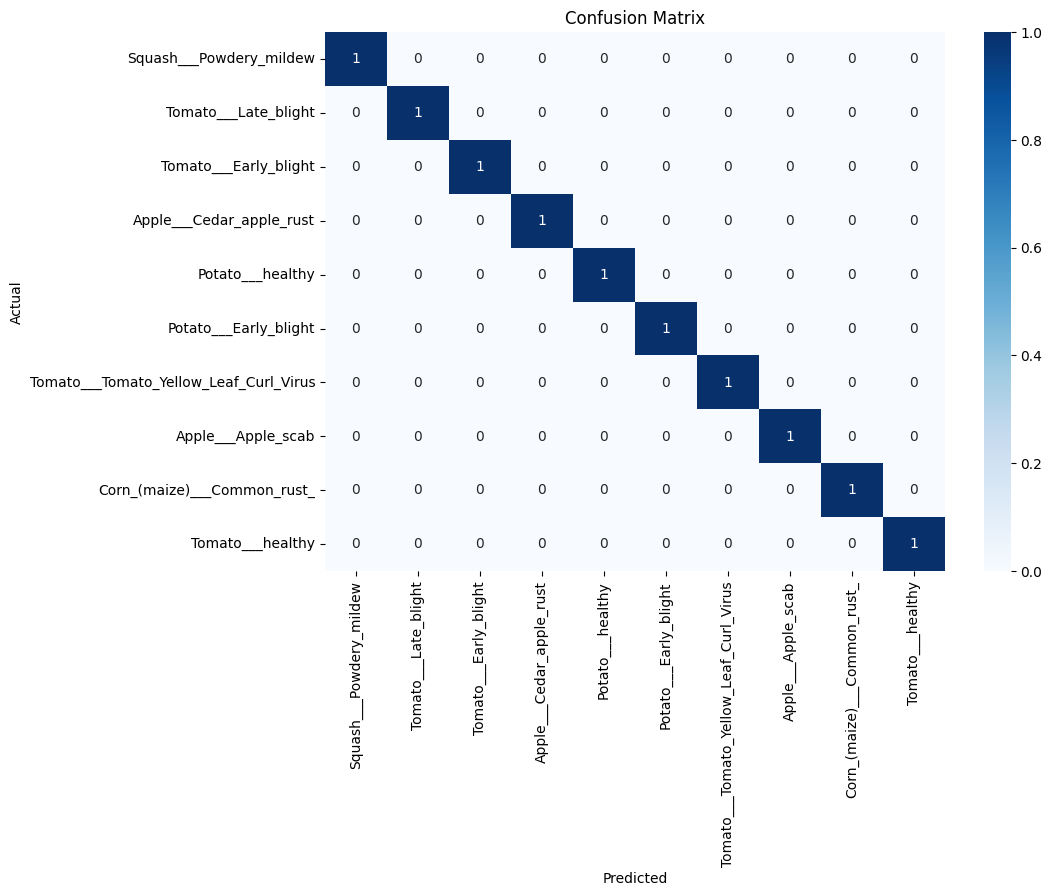

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=class_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


C:\Users\BELL\AppData\Local\Temp\ipykernel_5572\612484024.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes)


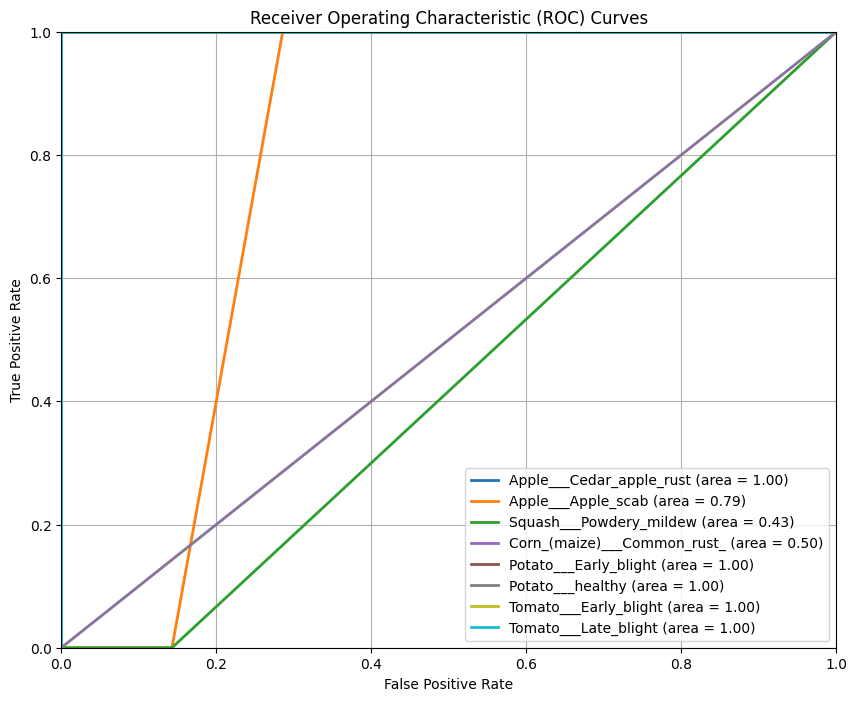

In [45]:
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Adjust the number of classes in class_labels as needed
class_labels = [
    'Apple___Cedar_apple_rust',
    'Apple___Apple_scab',
    'Squash___Powdery_mildew',
    'Corn_(maize)___Common_rust_',
    'Potato___Early_blight',
    'Potato___healthy',
    'Tomato___Early_blight',
    'Tomato___Late_blight',
]  # Total 8 classes here

# Example predicted probabilities (8 classes)
y_prob = np.array([
    [0.9, 0.1, 0, 0, 0, 0, 0, 0],
    [0.8, 0.2, 0, 0, 0, 0, 0, 0],
    [0.1, 0.9, 0, 0, 0, 0, 0, 0],
    [0.1, 0.2, 0.7, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0.9, 0.1, 0, 0],
    [0, 0, 0, 0, 0.7, 0.3, 0, 0],
    [0, 0, 0, 0, 0, 0, 0.9, 0.1],
    [0, 0, 0, 0, 0.1, 0, 0, 0.9],
])

# Binarize the true labels (assuming you have true labels)
true_labels = ["Apple___Cedar_apple_rust", "Apple___Apple_scab", "Squash___Powdery_mildew",
               "Corn_(maize)___Common_rust_", "Potato___Early_blight", "Potato___healthy",
               "Tomato___Early_blight", "Tomato___Late_blight"]
y_true_binary = label_binarize(true_labels, classes=class_labels)

# Initialize variables for ROC curve
n_classes = len(class_labels)
fpr = dict()
tpr = dict()
roc_auc = dict()

# Compute ROC curve and AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_binary[:, i], y_prob[:, i])
    roc_auc[i] = roc_auc_score(y_true_binary[:, i], y_prob[:, i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
colors = plt.cm.get_cmap('tab10', n_classes)

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors(i), lw=2, label='{} (area = {:.2f})'.format(class_labels[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.grid()
plt.show()


C:\Users\BELL\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


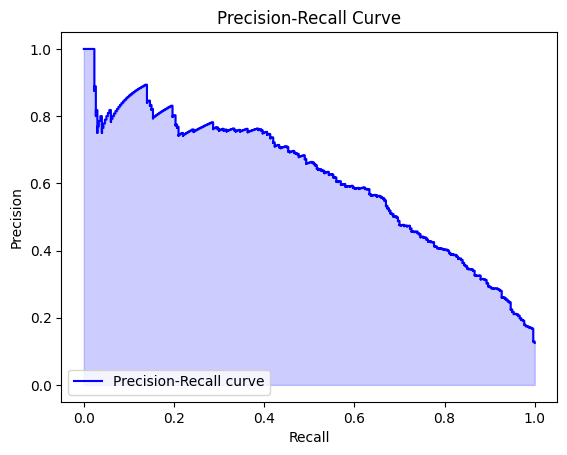

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier  # Example model
from sklearn.datasets import make_classification  # For demonstration

# Example dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=8, n_informative=10, random_state=42)

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a classifier (using MLPClassifier for demonstration)
model = MLPClassifier()
model.fit(X_train, y_train)

# Get predicted probabilities
y_scores = model.predict_proba(X_test)  # y_scores will have shape (num_samples, num_classes)

# Binarize the output for multi-label evaluation
from sklearn.preprocessing import label_binarize
y_true_binary = label_binarize(y_test, classes=np.unique(y))

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_true_binary.ravel(), y_scores.ravel())

# Plot Precision-Recall Curve
plt.figure()
plt.step(recall, precision, where='post', color='blue', label='Precision-Recall curve')
plt.fill_between(recall, precision, alpha=0.2, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()
